In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os,time,math,csv
import itertools
import collections

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

SLR model is given as:

$$E(t) = at + bt^2$$

where $E(t)$ is meters of SLR, $t$ is number of years after 2010, $a$ is global linear trend SLR constant ($0.0033$ m/yr), and $b$ is the SLR acceleration coefficient (in m/yr$^2$).


The "high" scenario is represented with $b_{\text{high}} = 1.86 \times 10^{-4}$. The "medium" scenario is represented with $b_{\text{medium}} = 7.44 \times 10^{-5}$.

$$E_{\text{high}}(t) = 0.0033t + (1.86 * 10^{-4})t^2$$
$$E_{\text{medium}}(t) = 0.0033t + (7.44 * 10^{-5})t^2$$

In [2]:
b_high  = 1.86 * 10.0**-4
b_medium  = 7.44 * 10.0**-5
a = 0.0033

def E(t, a, b):
    return a*t + b*t**2.0

In [3]:
xs = np.arange(0,91)
ys_high = E(xs, a, b_high)
ys_medium = E(xs, a, b_medium)

points = [0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]

ys_high_points = []
ys_medium_points = []

# We solve E(t) = x for t to find when SLR will have increased by x meters.
# Here, t will be the positive root of the quadratic.
for point in points:
    ys_high_points.append(np.max(np.roots([b_high, a, -point])))
    ys_medium_points.append(np.max(np.roots([b_medium, a, -point])))
    
ys_high_points = np.array(ys_high_points)
ys_medium_points = np.array(ys_medium_points)

In [4]:
ys_medium_points

array([  0.        ,  45.08398112,  70.32314312,  90.02156514,
       106.74453451, 121.53454345, 134.9384179 , 147.28539185])

In [5]:
ys_high_points

array([ 0.        , 32.25806452, 48.61381738, 61.25323454, 71.93934702,
       81.36876961, 89.90207222, 97.75462323])

In [6]:
points

[0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]

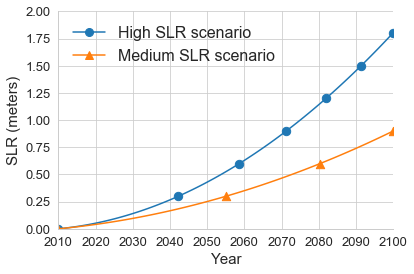

In [19]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

# Draw smooth lines
plt.plot(2010 + xs, ys_high, color="#1f77b4")
plt.plot(2010 + xs, ys_medium, color="#ff7f0e")

# Draw points
plt.scatter(2010 + ys_high_points, points, 70, marker="o", color="#1f77b4")
plt.scatter(2010 + ys_medium_points, points, 70, marker="^", color="#ff7f0e")

# Hack to make the legend make sense
high_line = matplotlib.lines.Line2D([], [], color='#1f77b4', marker='o', linestyle='-', markersize=8, label='High SLR scenario')
med_line = matplotlib.lines.Line2D([], [], color='#ff7f0e', marker='^', linestyle='-', markersize=8, label='Medium SLR scenario')

plt.legend(loc="best", fontsize=16, handles=[high_line, med_line])

plt.xlim([2010,2100])
plt.ylim([0,2])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel("Year", fontsize=15)
plt.ylabel("SLR (meters)", fontsize=15)

ax.tick_params(axis='both', which='major', pad=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()
plt.close()

In [10]:
df = pd.DataFrame(collections.OrderedDict([
    ("SLR Amount (meters)", points),
    ("Medium Scenario", np.round(2010 + ys_medium_points).astype(int)),
    ("High Scenario", np.round(2010 + ys_high_points).astype(int)),
]))
#df.set_index("SLR Amount", inplace=True)

In [14]:
df

,SLR Amount (meters),Medium Scenario,High Scenario
0,0.0,2010,2010
1,0.3,2055,2042
2,0.6,2080,2059
3,0.9,2100,2071
4,1.2,2117,2082
5,1.5,2132,2091
6,1.8,2145,2100
7,2.1,2157,2108


In [20]:
np.round(2010 + ys_high_points).astype(int)

array([2010, 2042, 2059, 2071, 2082, 2091, 2100, 2108])